In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import re

In [2]:
#Cell_2.
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
#Cell_3.
csv_in = 'bp3.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)

df2=df.copy()
df2['decrease']=df['blood_pressure_before']-df['blood_pressure_after']
df2[['decrease','age','weight','treatment_period']].corr()

print(df2.shape)
print(df2.info())
display(df2.head())

(30, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     30 non-null     int64 
 1   blood_pressure_before  30 non-null     int64 
 2   blood_pressure_after   30 non-null     int64 
 3   age                    30 non-null     int64 
 4   gender                 30 non-null     object
 5   treatment_period       30 non-null     int64 
 6   weight                 30 non-null     int64 
 7   decrease               30 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.0+ KB
None


,ID,blood_pressure_before,blood_pressure_after,age,gender,treatment_period,weight,decrease
0,1,150,135,45,M,3,80,15
1,2,145,138,34,F,1,65,7
2,3,160,150,60,M,2,85,10
3,4,155,140,50,F,3,72,15
4,5,149,136,40,M,2,78,13


In [4]:
#Cell_4.
display(df2.describe())
display(df2.describe(exclude='number'))

,ID,blood_pressure_before,blood_pressure_after,age,treatment_period,weight,decrease
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,150.666667,138.566667,46.033333,2.300000,75.866667,12.100000
std,8.803408,4.436007,4.124639,8.715754,0.702213,9.084786,3.166092
min,1.000000,142.000000,130.000000,30.000000,1.000000,60.000000,7.000000
25%,8.250000,148.000000,136.250000,40.000000,2.000000,68.250000,9.250000
50%,15.500000,150.000000,139.500000,46.000000,2.000000,76.500000,12.000000
75%,22.750000,153.000000,140.000000,51.500000,3.000000,82.750000,15.000000
max,30.000000,160.000000,150.000000,60.000000,3.000000,92.000000,18.000000


,gender
count,30
unique,2
top,M
freq,15


In [5]:
#Cell_5.
X = df2.drop(columns=['ID','blood_pressure_before','blood_pressure_after','decrease'])  # explanatory variables, 2D
y = df2['decrease']  # objective variable, 1D
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (30, 4)


,age,gender,treatment_period,weight
0,45,M,3,80
1,34,F,1,65
2,60,M,2,85
3,50,F,3,72
4,40,M,2,78


y: (30,)
0    15
1     7
2    10
3    15
4    13
Name: decrease, dtype: int64


In [6]:
#Cell_6.
print(X['gender'].value_counts())

gender
M    15
F    15
Name: count, dtype: int64


In [7]:
#Cell_7.
X_dumm = pd.get_dummies(X, drop_first=True, dtype='uint8')
print('X_dumm:', X_dumm.shape)
display(X_dumm.head())

X_dumm: (30, 4)


,age,treatment_period,weight,gender_M
0,45,3,80,1
1,34,1,65,0
2,60,2,85,1
3,50,3,72,0
4,40,2,78,1


In [8]:
#Cell_8.
X_dumm_c = sm.add_constant(X_dumm)
model = sm.OLS(y, X_dumm_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               decrease   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     11.39
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.11e-05
Time:                        11:39:53   Log-Likelihood:                -61.068
No. Observations:                  30   AIC:                             132.1
Df Residuals:                      25   BIC:                             139.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8412      5.469  

In [9]:
#Cell_9.
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.6457603048472933
Adj R2: 0.5890819536228602


In [10]:
#Cell_10.
print(results.params)

const              -6.841185
age                -0.064474
treatment_period    4.164549
weight              0.175309
gender_M           -1.938895
dtype: float64


In [11]:
#Cell_11.
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(y)

In [12]:
#Cell_12.
X_scaled = pd.DataFrame(X_scaled_ar, columns=X_dumm.columns)
y_scaled = pd.Series(y_scaled_ar, name=y.name)
model = sm.OLS(y_scaled, X_scaled)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:               decrease   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.591
Method:                 Least Squares   F-statistic:                              11.85
Date:                Sat, 16 Nov 2024   Prob (F-statistic):                    1.30e-05
Time:                        11:39:53   Log-Likelihood:                         -27.001
No. Observations:                  30   AIC:                                      62.00
Df Residuals:                      26   BIC:                                      67.61
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [13]:
#Cell_13.
print(results_scaled.params.sort_values(key=np.abs, ascending=False))

treatment_period    0.923663
weight              0.503032
gender_M           -0.311431
age                -0.177487
dtype: float64


In [14]:
#Cell_14.
X_test = pd.DataFrame([[54, 8, 70, 0],
                       [55, 2, 85, 1],
                        ],
                        columns=X_dumm.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,age,treatment_period,weight,gender_M
0,54,8,70,0
1,55,2,85,1


In [15]:
#Cell_15.
X_test_c = sm.add_constant(X_test, has_constant='add')
y_test = results.predict(X_test_c)
print('Predicted y:')
print(y_test)

Predicted y:
0    35.265250
1    10.904228
dtype: float64


In [16]:
#Cell_16.
y_pred = results.predict(X_dumm_c)
print('Predicted y:')
print(y_pred.head())

Predicted y:
0    14.836971
1     6.526345
2    10.581857
3    15.051022
4    10.644175
dtype: float64


In [17]:
#Cell_17.
y_min = np.append(y_pred, y).min()
y_max = np.append(y_pred, y).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

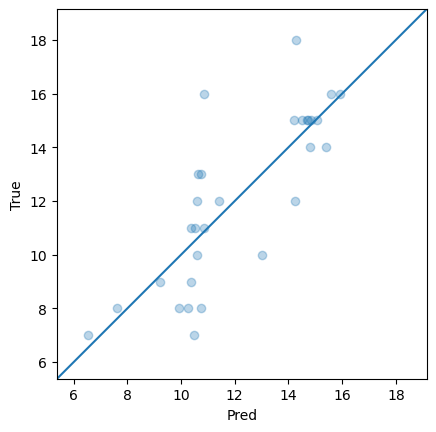

In [18]:
#Cell_18.
plt.scatter(y_pred, y, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [19]:
#Cell_19.
mse = mean_squared_error(y, y_pred)
print('MSE, RMSE:', mse, np.sqrt(mse))

MSE, RMSE: 3.432582646029728 1.8527230354345272


# 以上がCS3の内容。ここから変数選択等を行う。

In [20]:
#Cell_20.
d_scaled=pd.concat([X_scaled,y_scaled],axis=1)
display(d_scaled.head())

,age,treatment_period,weight,gender_M,decrease
0,-0.120586,1.013890,0.462751,1.0,0.931614
1,-1.404244,-1.882938,-1.216587,-1.0,-1.638356
2,1.629857,-0.434524,1.022530,1.0,-0.674617
3,0.462895,1.013890,-0.432896,-1.0,0.931614
4,-0.704067,-0.434524,0.238839,1.0,0.289122


In [21]:
#Cell_21.
# forward method for variable selection based on AIC.
# Stepwise feature selection method (forward); 変数増加法による変数選択
def step_aic_forward(model, exog, endog, **kwargs):
    '''
    This function calculates the best subset of explanatory (exogenous) variables based on AIC.
    Both exog and endog can be either str or list.

    Arguments:
        model: model from statsmodels.formula.api
        exog (str or list): explanatory (exogenous) variables
        endog (str or list): objective (endogenous) variables
        kwargs: additional keyword argments for model (data, family, ...)

    Return values:
        model: a model with the smallest AIC
    '''
    
    # Convert exog, endog into 1-d list
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # Selected exogenous variables

    # First, calculate AIC with a constant (no exogs)
    formula_head = 'Q("' + '") + Q("'.join(endog) + '") ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {:.3f}, formula: {}'.format(aic, formula))

    current_score, best_new_score = aic, aic

    # Break loop if all exogs are selected or no remaining exogs can improve AIC
    while True:
        score_with_candidates = []
        for candidate in remaining:
            # Calculate AIC for adding an exog one by one
            formula_tail = 'Q("' + '") + Q("'.join(selected + [candidate]) + '")'
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {:.3f}, formula: {}'.format(aic, formula))

            score_with_candidates.append((aic, candidate))

        # Select best_candidate with minimum AIC
        score_with_candidates.sort()
        best_score, best_candidate = score_with_candidates[0]

        # select best_candidate if AIC is improved
        improved = False
        if best_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_score
            improved = True
            
        if not remaining or not improved: break

    formula = formula_head + 'Q("' + '") + Q("'.join(selected) + '")'
    print('The best formula: {}'.format(formula))
    aic = model(formula=formula, **kwargs).fit().aic
    print('Minimum AIC: {:.3f}'.format(aic))
    
    ret = model(formula, **kwargs).fit()
    ret.model.exog_names_org = [re.sub(r'Q\(\"(.*)\"\)',r'\1',x) for x in list(ret.model.exog_names)]
    ret.model.endog_names_org = re.sub(r'Q\(\"(.*)\"\)',r'\1',ret.model.endog_names)
    return ret

In [22]:
#Cell_22.
header_y = y_scaled.name
header_x = X_scaled.columns
model = step_aic_forward(smf.ols, header_x,header_y, data=d_scaled)

AIC: 87.136, formula: Q("decrease") ~ 1
AIC: 89.050, formula: Q("decrease") ~ Q("gender_M")
AIC: 88.787, formula: Q("decrease") ~ Q("age")
AIC: 88.706, formula: Q("decrease") ~ Q("weight")
AIC: 63.116, formula: Q("decrease") ~ Q("treatment_period")
AIC: 64.880, formula: Q("decrease") ~ Q("treatment_period") + Q("gender_M")
AIC: 64.340, formula: Q("decrease") ~ Q("treatment_period") + Q("age")
AIC: 63.712, formula: Q("decrease") ~ Q("treatment_period") + Q("weight")
The best formula: Q("decrease") ~ Q("treatment_period")
Minimum AIC: 63.116


In [32]:
 X_scaled

,age,treatment_period,weight,gender_M
0,-0.120586,1.013890,0.462751,1.0
1,-1.404244,-1.882938,-1.216587,-1.0
2,1.629857,-0.434524,1.022530,1.0
3,0.462895,1.013890,-0.432896,-1.0
4,-0.704067,-0.434524,0.238839,1.0
5,-1.871029,1.013890,-1.776367,-1.0
6,1.046376,-1.882938,1.582310,1.0
7,0.112806,-0.434524,-0.880720,-1.0
8,1.629857,1.013890,0.686663,1.0
9,0.462895,-0.434524,-0.097028,-1.0


In [23]:
#Cell_23.
X_scaled2 = X_scaled[['treatment_period']]

import statsmodels.api as sm
mod2 = sm.OLS(y_scaled,X_scaled2)
res2 = mod2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:               decrease   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.565
Method:                 Least Squares   F-statistic:                              40.04
Date:                Sat, 16 Nov 2024   Prob (F-statistic):                    6.51e-07
Time:                        11:39:53   Log-Likelihood:                         -29.558
No. Observations:                  30   AIC:                                      61.12
Df Residuals:                      29   BIC:                                      62.52
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [25]:
#Cell_24.
X_final = X_dumm[['treatment_period']]

mod_final = sm.OLS(y, sm.add_constant(X_final))
res_final = mod_final.fit()
print(res_final.summary())

                            OLS Regression Results                            
Dep. Variable:               decrease   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     38.66
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.02e-06
Time:                        11:39:53   Log-Likelihood:                -63.624
No. Observations:                  30   AIC:                             131.2
Df Residuals:                      28   BIC:                             134.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.2028      1.326  

In [26]:
#Cell_25.
#Variance-covariance matrix.
Sigma = np.asmatrix(X_final.cov())

In [27]:
#Cell_26.
def Mahala2(vec_x, vec_mean, mat):
    length = mat.shape[0]
    vec_x = np.array(vec_x, dtype='float64')
    vec = np.asmatrix((vec_x - vec_mean).values.reshape(length, 1))
    inv = np.linalg.inv(mat)
    mahala2 = vec.T.dot(inv.dot(vec))
    return mahala2[0, 0]

In [28]:
#Cell_27.
import scipy.stats as ss
n = len(X_final) # 標本数. Sample size.
dfm = res_final.df_model # 独立変数の数（モデルの自由度）．　Number of IVs (Model degrees of freedom). 
t_0025 = ss.t.isf(q=0.05/2, df=n-dfm-1) # 自由度 n-dfm-1のt分布の上側2.5パーセント点(= ss.t.ppf(q=0.975, df=n-dfm-1))
vec_mean = X_final.mean() # 独立変数の平均を求める　Find average of independent variables
print(vec_mean)

treatment_period    2.3
dtype: float64


In [29]:
#Cell_28.
display(X_final.head())

,treatment_period
0,3
1,1
2,2
3,3
4,2


In [30]:
#Cell_29.
X = sm.add_constant(X_final).iloc[0,:] 
print(X)
hat_y=X.dot(res_final.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable
print(hat_y)

D2_0 = Mahala2(X_final.iloc[0,:], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Ve = res_final.scale #  残差変動の不偏分散． A scale factor for the covariance matrix.
Se_o = np.sqrt((1/n + D2_0 / (n-1)) * Ve) #観測値の場合　In case of observed value

ci_low = hat_y - t_0025 * Se_o# 下側信頼
ci_up = hat_y + t_0025 * Se_o # 上側信頼

print("理論値（theoretical value）:", hat_y)
print("理論値の信頼区間（CI of theoretical value）：({0},{1})".format(ci_low,ci_up))

const               1.0
treatment_period    3.0
Name: 0, dtype: float64
14.503496503496503
理論値（theoretical value）: 14.503496503496503
理論値の信頼区間（CI of theoretical value）：(13.391287025454936,15.61570598153807)


In [34]:
#Cell_30.
X_test2 = X_test[['treatment_period']] #未観測値の設定
X = sm.add_constant(X_test2).iloc[0,:]
print(X)
hat_y=X.dot(res_final.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2(X_test2.iloc[0,:], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance
Se_p = np.sqrt((1 + 1/n + D2_0 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

pi_low = hat_y - t_0025 * Se_p# 下側信頼
pi_up = hat_y + t_0025 * Se_p # 上側信頼

print("予測値（Predicted value）:", hat_y)
print("予測値の信頼区間（CI of predicted value）：({0},{1})".format(pi_low,pi_up))

const               1.0
treatment_period    8.0
Name: 0, dtype: float64
予測値（Predicted value）: 31.671328671328666
予測値の信頼区間（CI of predicted value）：(23.894084963853256,39.44857237880408)
